# Computación en arrays: Broadcasting

En la sección anterior vimos cómo las funciones universales de NumPy pueden utilizarse para *vectorizar* operaciones y así eliminar los lentos bucles de Python.
Otra forma de vectorizar operaciones es utilizar la funcionalidad de *broadcasting* de NumPy.
El broadcasting es simplemente un conjunto de reglas para aplicar ufunciones binarias (por ejemplo, suma, resta, multiplicación, etc.) en arrays de diferentes tamaños.

## Introducción al broadcasting

Recordemos que para arrays del mismo tamaño, las operaciones binarias se realizan elemento por elemento:

In [ ]:
import numpy as np

In [ ]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

El broadcasting permite realizar este tipo de operaciones binarias en arrays de diferentes tamaños: por ejemplo, podemos añadir fácilmente un escalar (piense en él como un array de cero dimensiones) a un array:

In [ ]:
a + 5

array([5, 6, 7])

Podemos pensar en esto como una operación que estira o duplica el valor ``5`` en el array ``[5, 5, 5]``, y añade los resultados.
La ventaja del broadcasting de NumPy es que esta duplicación de valores no tiene lugar realmente, pero es un modelo mental útil cuando pensamos en el broadcasting.

Podemos extender esto de forma similar a arrays de mayor dimensión. Observa el resultado cuando añadimos un array unidimensional a un array bidimensional:

In [ ]:
M = np.ones((3, 3))
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [ ]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

En este caso, el array unidimensional ``a`` se estira, o se difunde a través de la segunda dimensión para que coincida con la forma de ``M``.

Aunque estos ejemplos son relativamente fáciles de entender, los casos más complicados pueden implicar el broadcasting de ambos arrays. Considere el siguiente ejemplo:

In [ ]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [ ]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Al igual que antes hemos estirado o emitido un valor para que coincida con la forma del otro, aquí hemos estirado *ambos* ``a`` y ``b`` para que coincidan con una forma común, ¡y el resultado es un array bidimensional!
La geometría de estos ejemplos se visualiza en la siguiente figura (El código para producir este gráfico se puede encontrar en el [Apéndice](06.00-Figure-Code.ipynb#Broadcasting), y está adaptado de la fuente publicada en la documentación de [astroML](http://astroml.org). Utilizado con permiso).

![Broadcasting Visual](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/02.05-broadcasting.png?raw=1)

Las cajas de luz representan los valores emitidos: de nuevo, esta memoria extra no se asigna realmente en el curso de la operación, pero puede ser útil conceptualmente imaginar que lo es.

## Reglas de broadcasting

El broadcasting en NumPy sigue un estricto conjunto de reglas para determinar la interacción entre los dos arrays:

- Regla 1: Si los dos arrays difieren en su número de dimensiones, la forma de la que tiene menos dimensiones se *completa* con unos en su lado frontal (izquierdo).
- Regla 2: Si la forma de los dos arrays no coincide en ninguna dimensión, el array con forma igual a 1 en esa dimensión se estira para que coincida con la otra forma.
- Regla 3: Si en alguna dimensión los tamaños no coinciden y ninguno es igual a 1, se produce un error.

Para aclarar estas reglas, veamos algunos ejemplos en detalle.

### Ejemplo de broadcasting 1

Veamos cómo añadir un array bidimensional a un array unidimensional:

In [ ]:
M = np.ones((2, 3))
a = np.arange(3)

Consideremos una operación sobre estos dos arrays. La forma de los arrays es

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

Vemos por la regla 1 que el array ``a`` tiene menos dimensiones, así que lo rellenamos a la izquierda con unos:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

Por la regla 2, ahora vemos que la primera dimensión está en desacuerdo, así que estiramos esta dimensión para que coincida:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

Las formas coinciden, y vemos que la forma final será ``(2, 3)``:

In [ ]:
M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

### Ejemplo de broadcasting 2

Veamos un ejemplo en el que hay que emitir ambos arrays:

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

De nuevo, empezaremos escribiendo la forma de los arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

La regla 1 dice que debemos rellenar la forma de ``b`` con unos:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

Y la regla 2 nos dice que actualizamos cada una de ellas para que coincida con el tamaño correspondiente del otro array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Como el resultado coincide, estas formas son compatibles. Podemos ver esto aquí:

In [ ]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Ejemplo de broadcasting 3

Veamos ahora un ejemplo en el que los dos arrays no son compatibles:

In [ ]:
M = np.ones((3, 2))
a = np.arange(3)

Se trata de una situación ligeramente diferente a la del primer ejemplo: el array ``M`` está transpuesta.
¿Cómo afecta esto al cálculo? La forma de los arrays es

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

De nuevo, la regla 1 nos dice que debemos rellenar la forma de ``a`` con unos:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

Por la regla 2, la primera dimensión de ``a`` se estira para que coincida con la de ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Ahora llegamos a la regla 3: las formas finales no coinciden, por lo que estos dos arrays son incompatibles, como podemos observar al intentar esta operación:

In [ ]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Fíjate en la posible confusión que se produce aquí: podrías imaginar que haces que ``a`` y ``M`` sean compatibles, por ejemplo, rellenando la forma de ``a`` con las de la derecha en lugar de las de la izquierda.
Pero las reglas de broadcasting no funcionan así.
Este tipo de flexibilidad podría ser útil en algunos casos, pero conduciría a potenciales áreas de ambigüedad.
Si lo que quieres es el relleno del lado derecho, puedes hacerlo explícitamente reformando el array (usaremos la palabra clave ``np.newaxis`` introducida en [Los Básico de los arrays NumPy](02.02-Lo-Básico-de-los-Arrays-NumPy)):

In [ ]:
a[:, np.newaxis].shape

(3, 1)

In [ ]:
M + a[:, np.newaxis]

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

También hay que tener en cuenta que, aunque nos hemos centrado en el operador ``+``, estas reglas de broadcasting se aplican a *cualquier* ``ufunc`` binario.
Por ejemplo, aquí está la función ``logaddexp(a, b)``, que calcula ``log(exp(a) + exp(b))`` con más precisión que el enfoque ingenuo:

In [ ]:
np.logaddexp(M, a[:, np.newaxis])

array([[ 1.31326169,  1.31326169],
       [ 1.69314718,  1.69314718],
       [ 2.31326169,  2.31326169]])

Para más información sobre las numerosas funciones universales disponibles, consulte [Computación en arrays NumPy: Funciones universales](02.03-Computación-en-arrays-ufuncs.ipynb).

## El broadcasting en la práctica

Las operaciones de broadcasting constituyen el núcleo de muchos ejemplos que veremos a lo largo de este libro.
Ahora veremos un par de ejemplos sencillos en los que pueden ser útiles.

### Media de un array

En la sección anterior, vimos que los ufuncs permiten a un usuario de NumPy eliminar la necesidad de escribir explícitamente bucles lentos en Python. El broadcasting extiende esta capacidad.
Un ejemplo comúnmente visto es cuando se centra un array de datos.
Imagina que tienes un array de 10 observaciones, cada una de las cuales consta de 3 valores.
Usando la convención estándar (ver [Representación de datos en Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb#Data-Representation-in-Scikit-Learn)), almacenaremos esto en un array de $10 \times 3$:

In [ ]:
X = np.random.random((10, 3))

Podemos calcular la media de cada característica utilizando el agregado "mean" en la primera dimensión:

In [ ]:
Xmean = X.mean(0)
Xmean

array([ 0.53514715,  0.66567217,  0.44385899])

Y ahora podemos centrar el array ``X`` restando la media (esta es una operación broadcasting):

In [ ]:
X_centered = X - Xmean

Para comprobar que lo hemos hecho correctamente, podemos comprobar que el array centrado tiene una media cercana a cero:

In [ ]:
X_centered.mean(0)

array([  2.22044605e-17,  -7.77156117e-17,  -1.66533454e-17])

Dentro de la precisión de la máquina, la media es ahora cero.

### Graficar una función bidimensional

One place that broadcasting is very useful is in displaying images based on two-dimensional functions.
If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Utilizaremos Matplotlib para trazar este array bidimensional (estas herramientas se discutirán en su totalidad en [Densidad y gráficos de contorno](04.04-Densidad y gráficos de contorno.ipynb)):

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

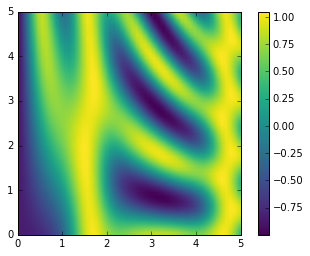

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

El resultado es una convincente visualización de la función bidimensional.

<!--NAVIGATION-->
< [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb) | [Contents](Index.ipynb) | [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) >



<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.05-Computation-on-arrays-broadcasting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
